The assignment of MP 4 is revised to fit our dataset that we are planning to be using for the final project.

the revised assignment looks like this:

###MINI PROJECT 4: MACHINE LEARNING FOR ANALYSIS AND PREDICTION OF CAR SALES

### Objective
To practice data analysis and prediction using classification and clustering algorithms, focusing on the dynamics of car sales.

### Problem Statement
Understanding the factors that influence car sales can provide valuable insights for manufacturers and dealers. Analyzing customer demographics, car features, and sales trends can help in developing strategies to boost sales.

### Tasks

### Data Wrangling and Exploration

Load and explore the dataset to understand its structure. Clean the data if necessary, and perform an exploratory data analysis.
Identify and select the most relevant features for predicting car sales, considering customer demographics, car specifications, and dealer information.

### Supervised Machine Learning: Classification

Train, test, and validate at least two machine learning models for classification to predict the likelihood of a car model being sold (e.g., high, medium, low likelihood).
Assess the models' performance using appropriate metrics and recommend the most accurate model.

### Unsupervised Machine Learning: Clustering

Use clustering algorithms (e.g., K-Means) to segment the cars or customers into groups based on similarities in features or buying patterns.
Evaluate the clustering quality (e.g., using silhouette scores) and suggest the most coherent cluster configuration.

### Machine Learning Application

Develop an interactive prototype (e.g., using Streamlit) that visualizes the analysis and model predictions.
Incorporate a feature allowing users to input car or customer data to predict sales outcomes.
Test the application with various inputs to evaluate its performance and user experience.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
# We will start out with displaying the first few rows of the data

print(df.head())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [4]:
# Lets check for a summary of the data

print(df.describe())

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


In [5]:
# Lets now get some information regarding the data, as columns, data types, and non-null values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


In [6]:
# now that we have information about the data, we can start cleaning it up

# We will start by checking for missing values

print(df.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [7]:
# We do have a missing value in Customer name, but because we need to anonymize the data, we will drop the column

df = df.drop('Customer Name', axis=1)


In [8]:
# To continue out path for anonymizing the data, we will drop the column that has no relevance for our analysis

df = df.drop('Car_id', axis=1)
df = df.drop('Phone', axis=1)
df = df.drop('Dealer_No ', axis=1)


In [9]:
# Lets now check for duplicates 

print(df.duplicated().sum())

0


In [10]:
# Summary statistics for numerical columns
print(df.describe())

       Annual Income     Price ($)
count   2.390600e+04  23906.000000
mean    8.308403e+05  28090.247846
std     7.200064e+05  14788.687608
min     1.008000e+04   1200.000000
25%     3.860000e+05  18001.000000
50%     7.350000e+05  23000.000000
75%     1.175750e+06  34000.000000
max     1.120000e+07  85800.000000


In [11]:
# Categorizing 'Sale_Likelihood' based on 'Price ($)' quantiles
df['Sale_Likelihood'] = pd.qcut(df['Price ($)'], q=4, labels=['low', 'medium-low', 'medium-high', 'high'])


In [12]:
# Lets try to understand the distribution of the data

print(df['Gender'].value_counts())


Gender
Male      18798
Female     5108
Name: count, dtype: int64


In [13]:
print(df['Model'].value_counts())

Model
Diamante         418
Silhouette       411
Prizm            411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: count, Length: 154, dtype: int64


In [14]:
print(df['Dealer_Region'].value_counts())

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


To identify the most important features for predicting car sales from our dataset, we'll consider the nature of each feature and its potential influence on car purchasing decisions.
While a detailed statistical analysis or feature importance analysis using machine learning models would provide the most accurate insight, we can make some initial assessments based on general knowledge.

When looking at the data available we can prioritize what would consider being the most relevant for predicting car sales, and this is listed below with the highest priority on top till the lowest in the buttom:

Annual Income: Affects purchasing power.

Price : Directly influences buying decisions.

Company: Brand loyalty and perception impact sales.

Model: Different models have varying levels of demand.

Dealer_Region: Regional sales trends can highlight demand patterns.

Body Style: Matches with customer lifestyle needs.

Engine: Preferences for performance, efficiency, or eco-friendliness.

Transmission: Some buyers have strong preferences.

Gender: May influence preference but not a primary sales driver.

Color: A matter of personal taste, less impactful on overall sales.

After this prioritzation list we can now create a subset for the most relevant columns for predicting car sales. 
We will in this subset exclude Engine,Gender and Color. Engine because in the data we have the engine part is mainly focused on camshafts for valvets, and not weather the size or type of the engine. Gender and color is also excluded as they possible may have an impact on car sales, they were less impactful compared to the other features. 

In [15]:
features = ['Annual Income', 'Company', 'Model', 'Price ($)', 'Dealer_Region', 'Body Style', 'Transmission']
df_selected_features = df[features]


print(df_selected_features.head())

   Annual Income   Company       Model  Price ($) Dealer_Region Body Style  \
0          13500      Ford  Expedition      26000    Middletown        SUV   
1        1480000     Dodge     Durango      19000        Aurora        SUV   
2        1035000  Cadillac    Eldorado      31500    Greenville  Passenger   
3          13500    Toyota      Celica      14000         Pasco        SUV   
4        1465000     Acura          TL      24500    Janesville  Hatchback   

  Transmission  
0         Auto  
1         Auto  
2       Manual  
3       Manual  
4         Auto  


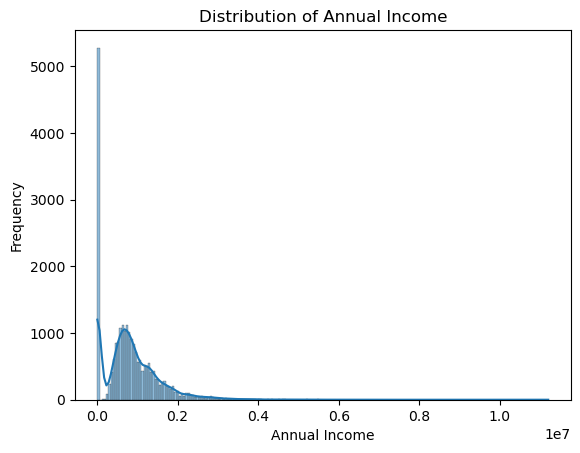

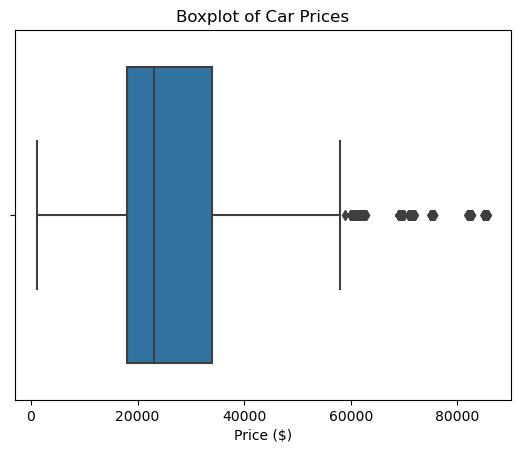

In [16]:
# Histogram for Annual Income
sns.histplot(df['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Price ($)
sns.boxplot(x=df['Price ($)'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price ($)')
plt.show()

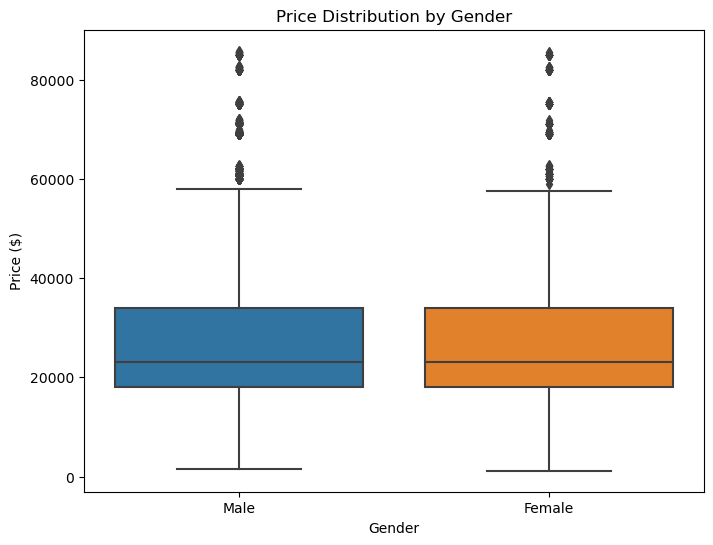

In [17]:
# Lets create a boxplot to understand the distribution of the price in relation to gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

In [18]:
print(df['Annual Income'].value_counts())

Annual Income
13500      5273
1100000     162
600000      160
800000      151
1300000     148
           ... 
2145000       1
3171000       1
1134000       1
706750        1
1369000       1
Name: count, Length: 2508, dtype: int64


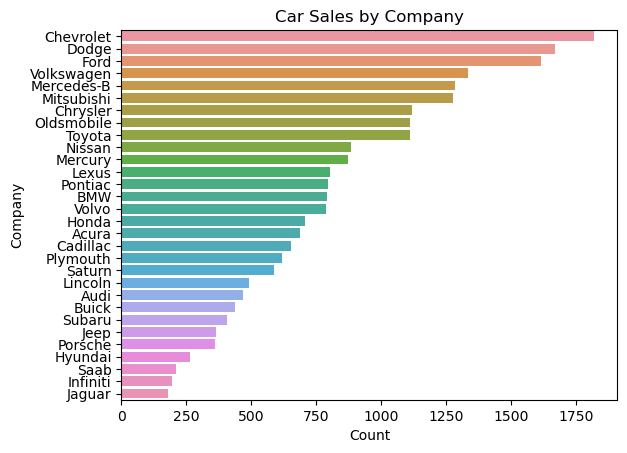

In [19]:
# Bar chart for Company
sns.countplot(y=df['Company'], order = df['Company'].value_counts().index)
plt.title('Car Sales by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

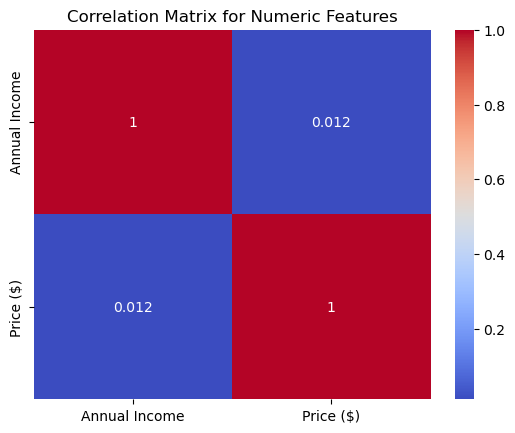

In [20]:
corr_matrix = df[['Annual Income', 'Price ($)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


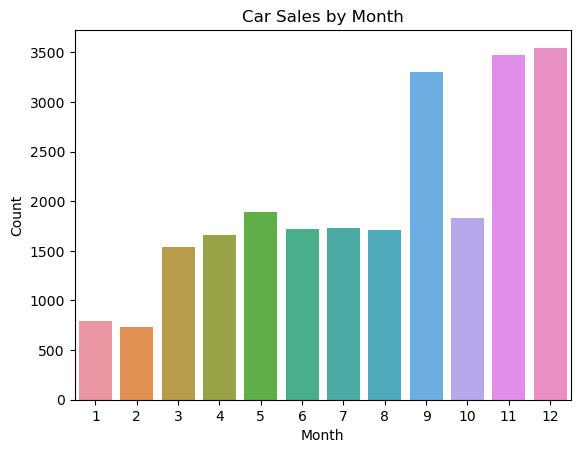

In [21]:
# Example: Creating a 'Sale Month' feature from 'Date'
df['Sale Month'] = pd.to_datetime(df['Date']).dt.month

# Visualizing sales by month
sns.countplot(x=df['Sale Month'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [22]:
# Identifying outliers in 'Annual Income' for example
q1, q3 = df['Annual Income'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# These are the outliers saved in a new dataframe if we want to use them
df_filtered = df[(df['Annual Income'] > lower_bound) & (df['Annual Income'] < upper_bound)]


In [23]:
df_selected_features.sample(10).T

,12622,14649,14580,10151,19206,11171,23694,12704,22079,5383
Annual Income,1706000,1001000,631000,515000,706000,13500,1650000,1865000,620000,598000
Company,Nissan,Mercedes-B,Cadillac,Jeep,Saturn,Buick,Chevrolet,Saturn,Jaguar,Chevrolet
Model,Quest,SLK,Seville,Grand Cherokee,LW,Park Avenue,Lumina,LW,S-Type,Prizm
Price ($),19601,17100,44000,21001,13000,45000,42000,13501,16000,16000
Dealer_Region,Austin,Aurora,Janesville,Middletown,Austin,Middletown,Aurora,Janesville,Aurora,Janesville
Body Style,SUV,Passenger,Hardtop,SUV,Hatchback,Hatchback,Passenger,Hatchback,Passenger,Hardtop
Transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Auto,Manual


In [24]:
# Applying one hot encoding to the categorical columns

df_one_hot = pd.get_dummies(df, columns=['Company', 'Model', 'Dealer_Region', 'Body Style', 'Transmission'])

# if machine learning doesnt work, we can try to convert the boolean values to integers

#df_one_hot = df_one_hot.astype(int)

In [25]:
print(df_one_hot.head())

       Date Gender  Annual Income                          Dealer_Name  \
0  1/2/2022   Male          13500  Buddy Storbeck's Diesel Service Inc   
1  1/2/2022   Male        1480000                     C & M Motors Inc   
2  1/2/2022   Male        1035000                          Capitol KIA   
3  1/2/2022   Male          13500               Chrysler of Tri-Cities   
4  1/2/2022   Male        1465000                    Chrysler Plymouth   

                      Engine       Color  Price ($) Sale_Likelihood  \
0  DoubleÂ Overhead Camshaft       Black      26000     medium-high   
1  DoubleÂ Overhead Camshaft       Black      19000      medium-low   
2          Overhead Camshaft         Red      31500     medium-high   
3          Overhead Camshaft  Pale White      14000             low   
4  DoubleÂ Overhead Camshaft         Red      24500     medium-high   

   Sale Month  Company_Acura  ...  Dealer_Region_Middletown  \
0           1          False  ...                      True   
1 

In [26]:
# Convert all boolean columns to integers
for column in df_one_hot.columns:
    if df_one_hot[column].dtype == 'bool':
        df_one_hot[column] = df_one_hot[column].astype(int)


print(df_one_hot.head())

       Date Gender  Annual Income                          Dealer_Name  \
0  1/2/2022   Male          13500  Buddy Storbeck's Diesel Service Inc   
1  1/2/2022   Male        1480000                     C & M Motors Inc   
2  1/2/2022   Male        1035000                          Capitol KIA   
3  1/2/2022   Male          13500               Chrysler of Tri-Cities   
4  1/2/2022   Male        1465000                    Chrysler Plymouth   

                      Engine       Color  Price ($) Sale_Likelihood  \
0  DoubleÂ Overhead Camshaft       Black      26000     medium-high   
1  DoubleÂ Overhead Camshaft       Black      19000      medium-low   
2          Overhead Camshaft         Red      31500     medium-high   
3          Overhead Camshaft  Pale White      14000             low   
4  DoubleÂ Overhead Camshaft         Red      24500     medium-high   

   Sale Month  Company_Acura  ...  Dealer_Region_Middletown  \
0           1              0  ...                         1   
1 

In [27]:
# Check for number of different regions

df_selected_features['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64

In [28]:
#We will now create a new column called 'City_Population' and map the population of the city to the region

population_mapping = {
    'Austin': 964177,
    'Janesville': 65942,
    'Scottsdale': 242753,
    'Pasco': 78871,
    'Aurora': 389347,
    'Middletown': 47108,
    'Greenville': 72095
}

df['City_Population'] = df['Dealer_Region'].map(population_mapping)

# Display the new column in correlation with the dealer region
dealer_region_and_population = df[['Dealer_Region', 'City_Population']]
print(dealer_region_and_population.head())

  Dealer_Region  City_Population
0    Middletown            47108
1        Aurora           389347
2    Greenville            72095
3         Pasco            78871
4    Janesville            65942


### Supervised machine learning
lets now try to use the data we have gathered to predict the sales likelyhood. We will do this based on the data we have about the price of a car and the avg. income to predict how likely it is a car is going to be sold, going by low, medium and high, likelyhood.

## udkommenteret
def categorize_sales(row):
    if row['Price ($)'] < row['Annual Income'] * 0.3:
        return 'high'
    elif row['Price ($)'] < row['Annual Income'] * 0.6:
        return 'medium'
    else:
        return 'low'

df['Sale_Likelihood'] = df.apply(categorize_sales, axis=1)

print(df.columns)

// ud kommenteret kode, erstattet med quantile classification men kan måske bruges senere - Vivek



In [29]:
label_encoder = LabelEncoder()
df_one_hot['Sale_Likelihood'] = label_encoder.fit_transform(df_one_hot['Sale_Likelihood'])

In [30]:
X = df_one_hot.drop(['Date', 'Gender', 'Dealer_Name', 'Color', 'Engine','Sale_Likelihood'], axis=1)
y = df_one_hot['Sale_Likelihood'] 

In [31]:
df_one_hot['Sale_Likelihood'] = df['Sale_Likelihood']

In [32]:
# Splitting data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

# before training the models we, standerise our features, since they each have their own "scale", this way every feature has a more balanced influence on the model
>>> from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_encoded)
log_reg_predictions_encoded = log_reg.predict(X_test)

In [34]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train_encoded)
rf_predictions_encoded = rf_classifier.predict(X_test)

In [35]:
# Evaluate models
for model, predictions_encoded in [('Logistic Regression', log_reg_predictions_encoded), ('Random Forest', rf_predictions_encoded)]:
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_test_encoded, predictions_encoded))
    print("Classification Report:\n", classification_report(y_test_encoded, predictions_encoded))
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, predictions_encoded), "\n")

Model: Logistic Regression
Accuracy: 0.36616478460895024
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.89      0.51      1174
           1       0.58      0.29      0.39      1256
           2       0.23      0.13      0.16      1127
           3       0.34      0.16      0.22      1225

    accuracy                           0.37      4782
   macro avg       0.38      0.37      0.32      4782
weighted avg       0.38      0.37      0.32      4782

Confusion Matrix:
 [[1046   12   78   38]
 [ 474  364  200  218]
 [ 776   83  145  123]
 [ 655  164  210  196]] 

Model: Random Forest
Accuracy: 0.999581764951903
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1174
           1       1.00      1.00      1.00      1256
           2       1.00      1.00      1.00      1127
           3       1.00      1.00      1.00      1225

    accuracy             